# Introduction
## Customer Churn Prediction

Customer attrition or churn, is when customers stop doing business with a company. It can have a significant impact on a company's revenue and it's crucial for businesses to find out the reasons why customers are leaving and take steps to reduce the number of customers leaving. One way to do this is by identifying customer segments that are at risk of leaving, and implementing retention strategies to keep them. Also, by using data and machine learning techniques, companies can predict which customers are likely to leave in the future and take actions to keep them before they decide to leave.


# Steps Involved to Predict Customer Churn
- Importing Libraries
- Loading Dataset
- Exploratory Data Analysis
- Outliers using IQR method
- Cleaning and Transforming Data
    - One-hot Encoding
    - Rearranging Columns
    - Feature Scaling
    - Feature Selection
- Prediction using Logistic Regression
- Prediction using Support Vector Classifier
- Prediction using Decision Tree Classifier
- Prediction using KNN Classifier

## Importing Libraries

First of all, we will import knwon necessary libraries.

In [69]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## Loading Dataset
We use pandas to read the dataset and preprocess it.

In [ ]:
df = pd.read_csv(r"C:\Users\Sanjay\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.shape

(7043, 21)

In [71]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We have 2 types of features in the dataset: categorical (two or more values and without any order) and numerical. Most of the feature names are self-explanatory, except for:
 - Partner: whether the customer has a partner or not (Yes, No),
 - Dependents: whether the customer has dependents or not (Yes, No),
 - OnlineBackup: whether the customer has online backup or not (Yes, No, No internet service),
 - tenure: number of months the customer has stayed with the company,
 - MonthlyCharges: the amount charged to the customer monthly,
 - TotalCharges: the total amount charged to the customer.

There are 7043 customers in the dataset and 19 features without customerID (non-informative) and Churn column (target variable). Most of the categorical features have 4 or less unique values.

In [72]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [73]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [75]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [76]:
df.duplicated().sum()

np.int64(0)

#### Basic Data Cleaning:
As we have already observered in above cell that Totalcharges is given as object datatype but it is float datatype. We will fix it here.

In [ ]:
df['TotalCharges'].dtype

dtype('O')

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [ ]:
df['TotalCharges'].dtype

dtype('float64')

In [ ]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [ ]:
df.skew(numeric_only= True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [ ]:
df.corr(numeric_only= True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


### Feature distribution
We plot distributions for numerical and categorical features to check for outliers and compare feature distributions with target variable.

#### Numerical features distribution

Numeric summarizing techniques (mean, standard deviation, etc.) don't show us spikes, shapes of distributions and it is hard to observe outliers with it. That is the reason we use histograms.

In [ ]:
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

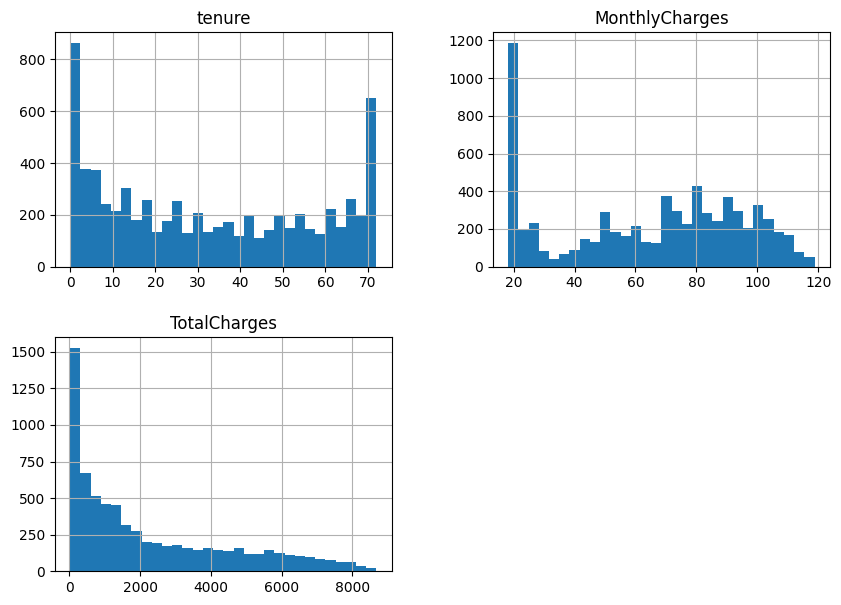

In [ ]:
df[numerical_features].hist(bins=30, figsize=(10, 7))

We look at distributions of numerical features in relation to the target variable. We can observe that the greater TotalCharges and tenure are the less is the probability of churn.

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

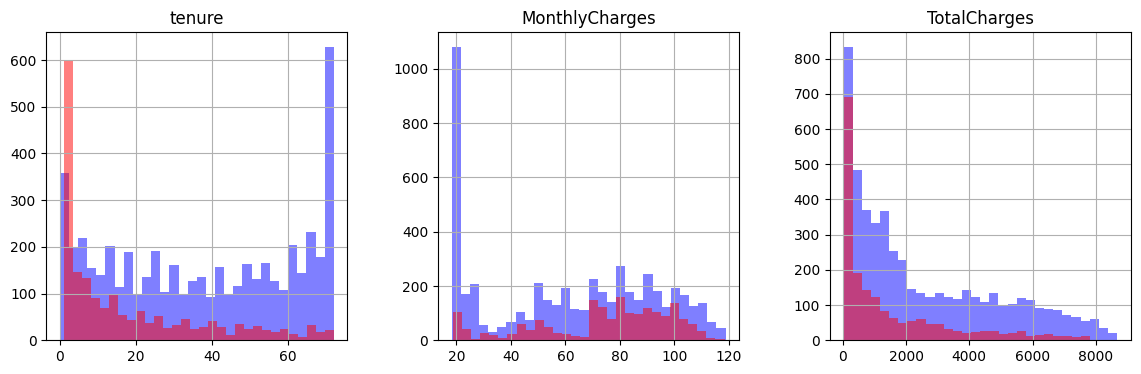

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

#### Categorical feature distribution

To analyze categorical features, we use bar charts. We observe that Senior citizens and customers without phone service are less represented in the data.

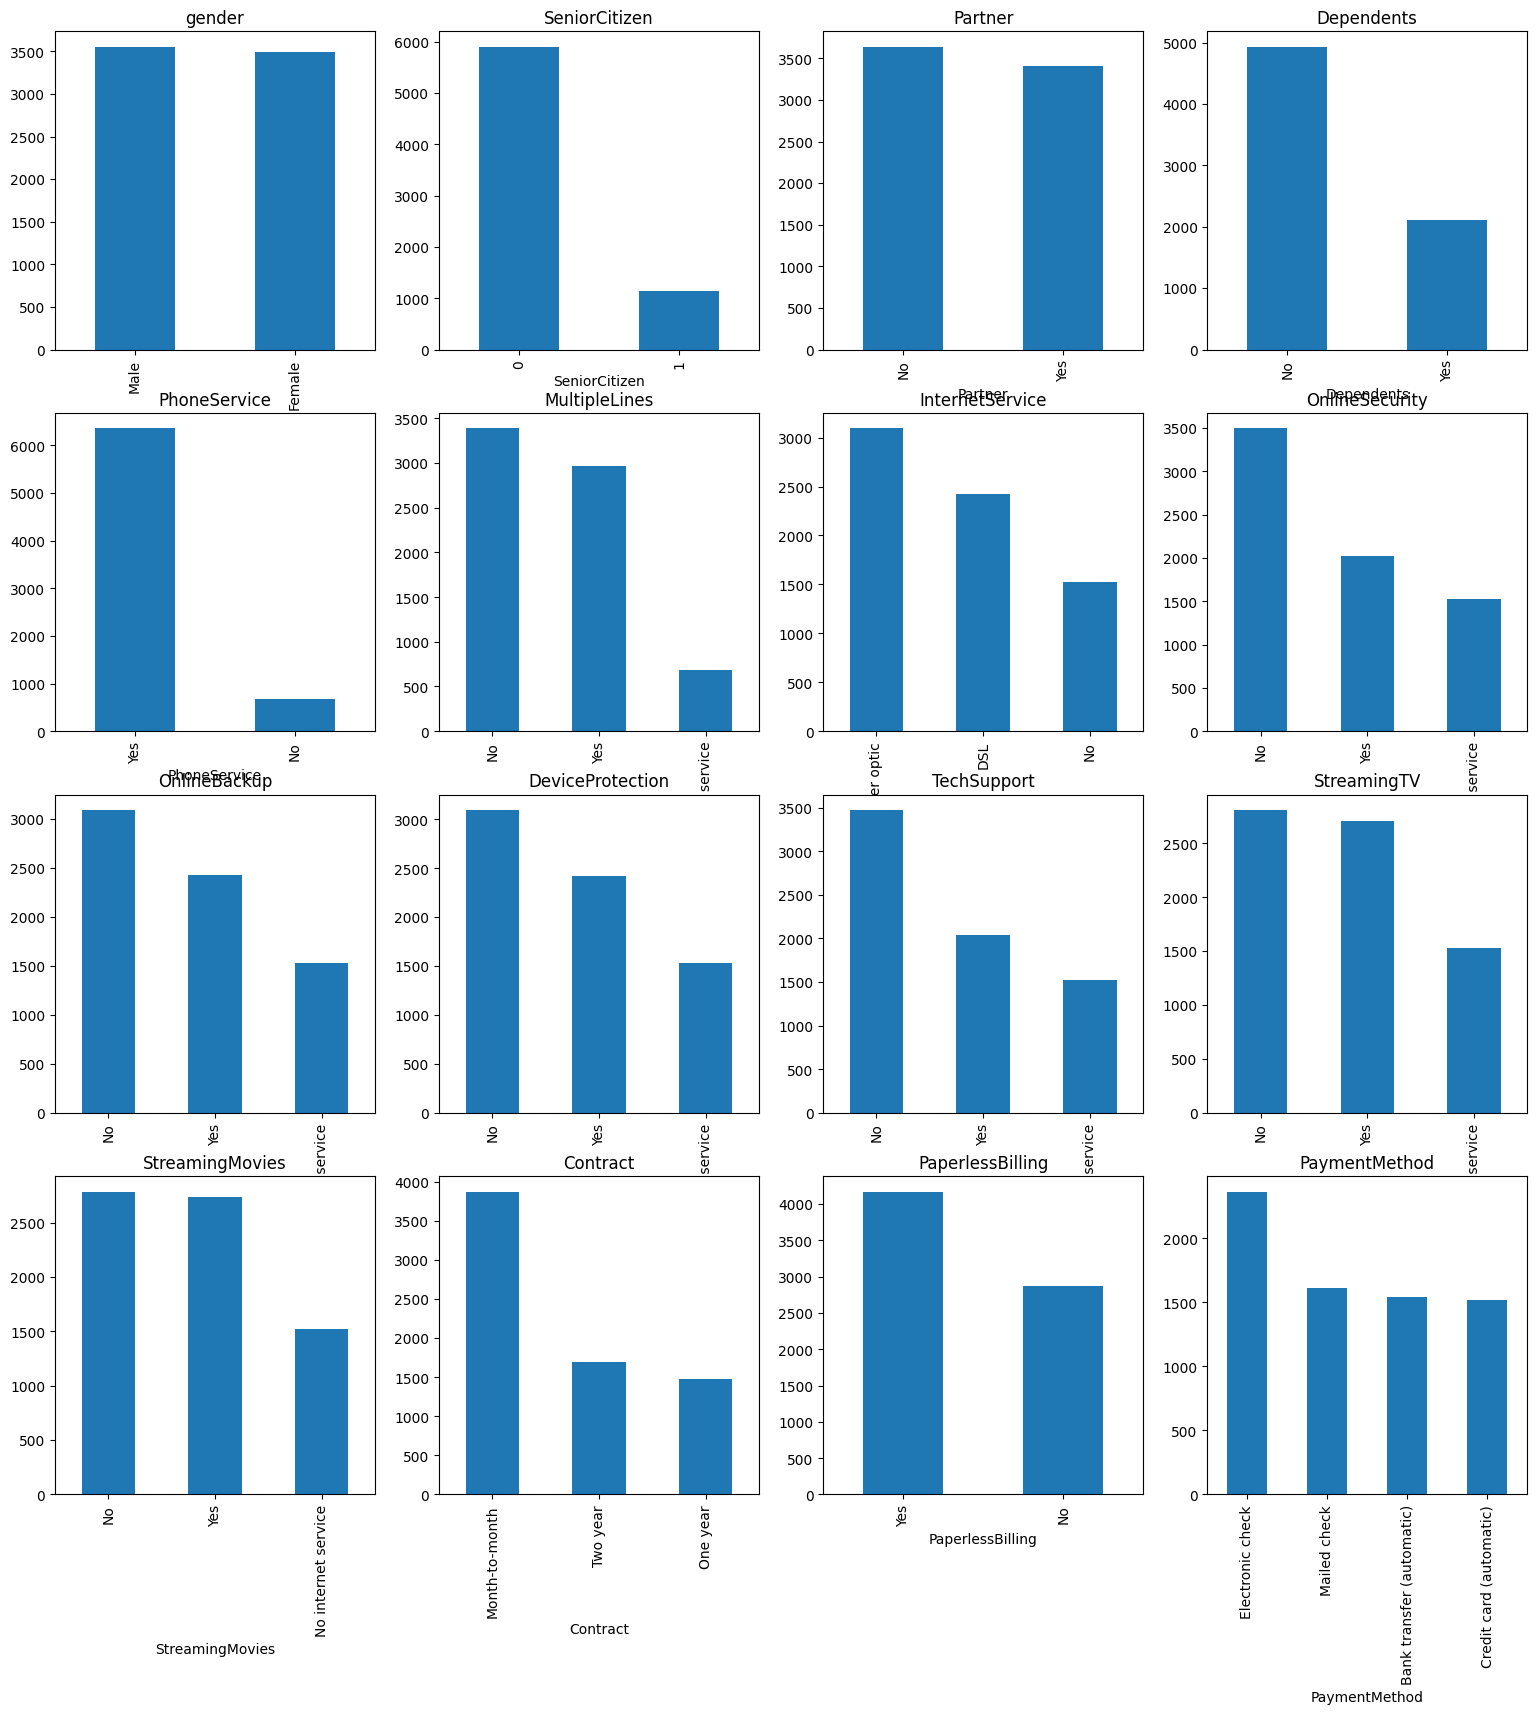

In [ ]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS,COLS, figsize=(19,19))
row, col = 0, 0,
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)

The next step is to look at categorical features in relation to the target variable. We do this only for contract feature. Users who have a month-to-month contract are more likely to churn than users with long term contracts.

Text(0.5, 1.0, 'churned')

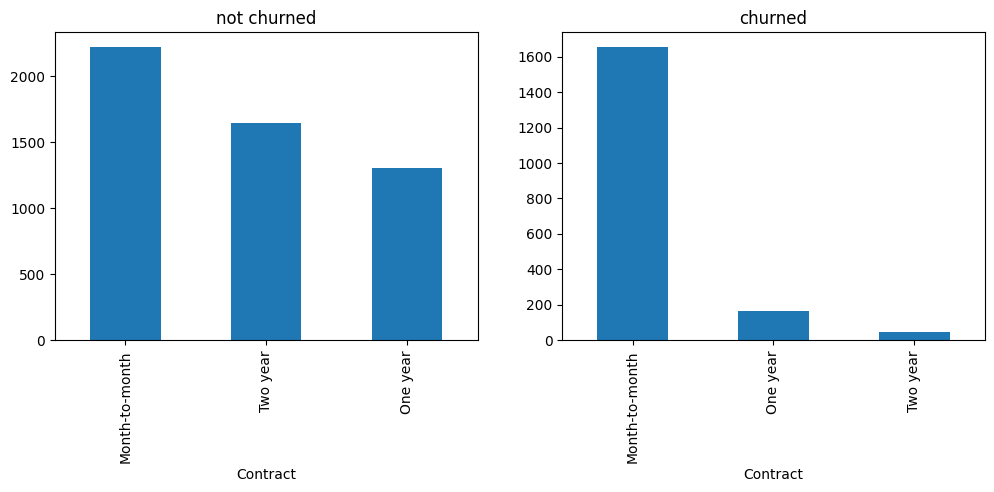

In [ ]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[df.Churn == "No"][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')

### Target variable distribution

Text(0.5, 1.0, 'churned')

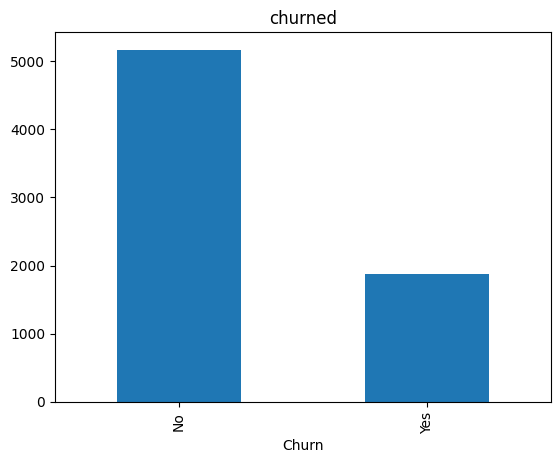

In [ ]:
df[target].value_counts().plot(kind='bar').set_title('churned')

Target variable distribution shows that we are dealing with an imbalanced problem as there are many more non-churned as compare to churned users. The model would achieve high accuracy as it would mostly predict majority class - users who didn't churn in our example.

Few things we can do to minimize the influence of imbalanced dataset:
- resample data,
- collect more samples,
- use precision and recall as accuracy metrics.

## Outliers Analysis with IQR Method

In [ ]:
x = ['tenure','MonthlyCharges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

No outliers in tenure
No outliers in MonthlyCharges


## Cleaning and Transforming Data

In [90]:
df.drop(['customerID'],axis = 1,inplace = True)

In [91]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Dropped customerID because it is not needed

### On Hot Encoding

In [92]:
df1=pd.get_dummies(data=df,columns=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

In [93]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [94]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn_Yes']]

In [95]:
from sklearn.impute import SimpleImputer

# The imputer will replace missing values with the mean of the non-missing values for the respective columns

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

### Feature Scaling

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [97]:
scaler.fit(df1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes',axis = 1))

### Feature Selection

In [98]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

## Prediction using Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [100]:
predLR = logmodel.predict(X_test)
predLR

array([False, False, False, ..., False, False, False], shape=(2113,))

In [101]:
print(classification_report(Y_test, predLR))

              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1557
        True       0.65      0.53      0.58       556

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



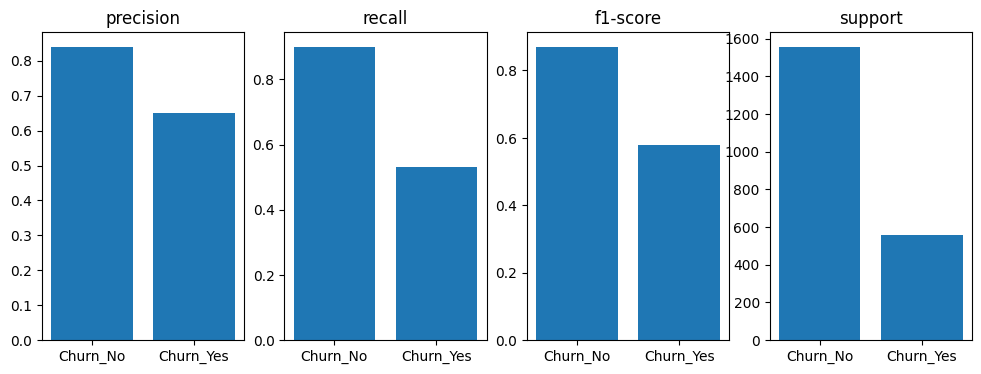

In [102]:
# calculate the classification report
report = classification_report(Y_test, predLR, target_names=['Churn_No', 'Churn_Yes'])

# split the report into lines
lines = report.split('\n')

# split each line into parts
parts = [line.split() for line in lines[2:-5]]

# extract the metrics for each class
class_metrics = dict()
for part in parts:
    class_metrics[part[0]] = {'precision': float(part[1]), 'recall': float(part[2]), 'f1-score': float(part[3]), 'support': int(part[4])}

# create a bar chart for each metric
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
metrics = ['precision', 'recall', 'f1-score', 'support']
for i, metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(), [class_metrics[key][metric] for key in class_metrics.keys()])
    ax[i].set_title(metric)

# display the plot
plt.show()

In [103]:
confusion_matrix_LR = confusion_matrix(Y_test, predLR)

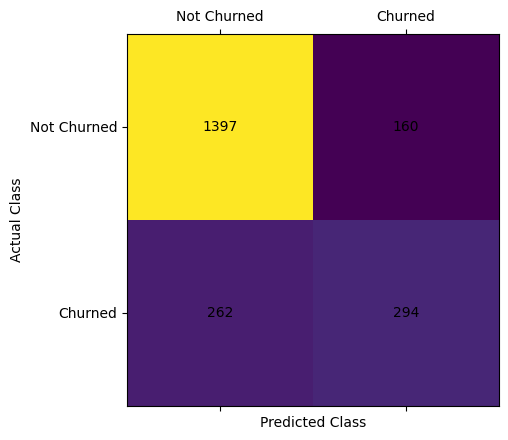

In [104]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix(Y_test, predLR))

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_LR[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

###Accuracy using Logistic Regression

In [105]:
accuracy_score(Y_test, predLR)

0.8002839564600095

## Prediction using Support Vector Classifier

In [106]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)
print(classification_report(Y_test, y_pred_svc))

              precision    recall  f1-score   support

       False       0.83      0.92      0.87      1557
        True       0.67      0.48      0.56       556

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



In [107]:
confusion_matrix_svc = confusion_matrix(Y_test, y_pred_svc)

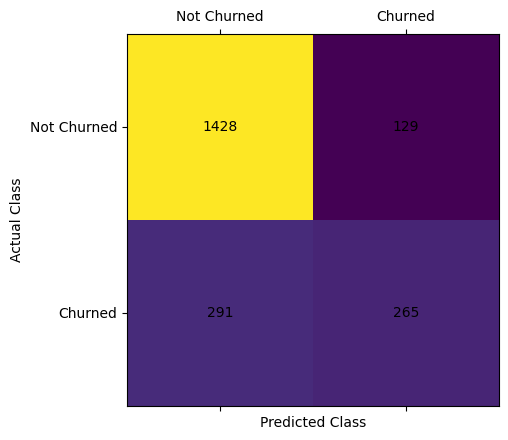

In [108]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_svc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_svc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [109]:
svc.score(X_train,Y_train)

0.8170385395537525

In [110]:
accuracy_score(Y_test, y_pred_svc)

0.8012304779933743

## Prediction using Decision Tree Classifier

In [111]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)

In [112]:
print(classification_report(Y_test, y_pred_dtc))

              precision    recall  f1-score   support

       False       0.82      0.80      0.81      1557
        True       0.47      0.49      0.48       556

    accuracy                           0.72      2113
   macro avg       0.64      0.65      0.64      2113
weighted avg       0.72      0.72      0.72      2113



In [113]:
confusion_matrix_dtc = confusion_matrix(Y_test, y_pred_dtc)

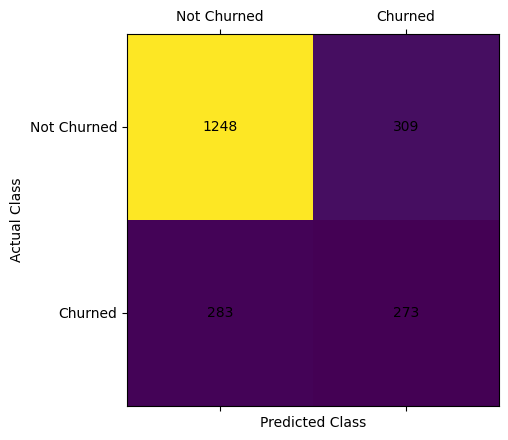

In [114]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_dtc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [115]:
dtc.score(X_train,Y_train)

0.9987829614604462

In [116]:
accuracy_score(Y_test, y_pred_dtc)

0.7198296261239944

## Prediction using KNN Classifier

In [117]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [118]:
pred_knn = knn.predict(X_test)

In [119]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

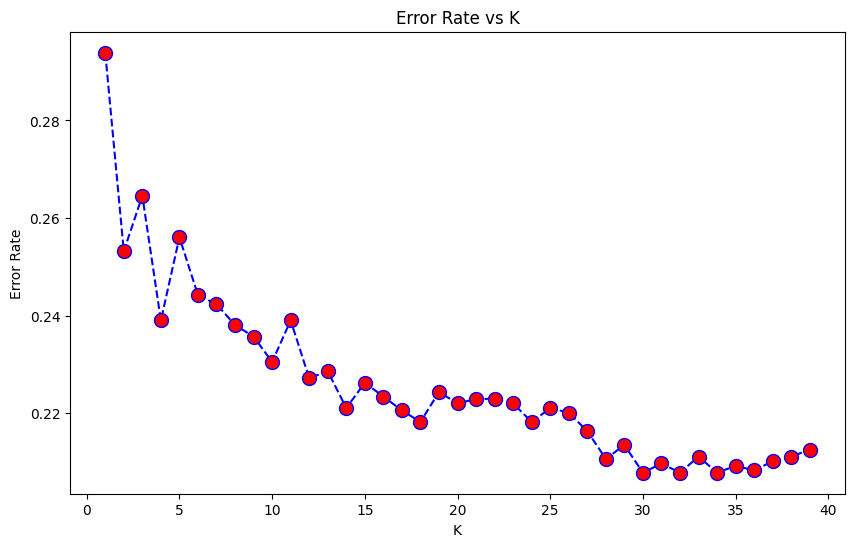

In [120]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [121]:
print(classification_report(Y_test,pred_knn))

              precision    recall  f1-score   support

       False       0.84      0.88      0.86      1557
        True       0.62      0.55      0.58       556

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



In [122]:
confusion_matrix_knn = confusion_matrix(Y_test,pred_knn)

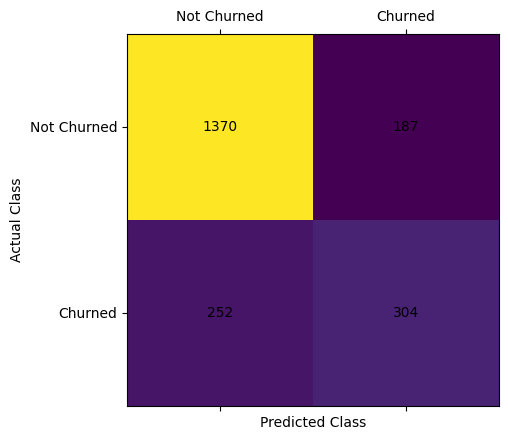

In [123]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_knn)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_knn[i, j], ha='center', va='center')

# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [124]:
knn.score(X_train,Y_train)

0.8008113590263691

In [125]:
accuracy_score(Y_test, pred_knn)

0.792238523426408

# **Conclusions**

● Customers with monthly contracts are 20% more likely to churn than with annual
contracts

● Customers have the highest probability of churning within the first 20 months on the platform

● Tech-Support & Online Security add-ons play a critical role in preventing churn, whilestreaming add-ons significantly increase likelihood of churn

● Customers are twice as likely to churn when the monthly charge is greater than $60

# **Accuracy**

*  SVM: Accuracy = 0.8012List item
*  Decision Tree: Accuracy = 0.725
*   Logistic Regression: Accuracy = 0.8003
*   K-Nearest Neighbors (KNN): Accuracy = 0.7922List item









In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Train models and store them properly
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, Y_train)

svm_model = SVC(probability=True)
svm_model.fit(X_train, Y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

print("✅ All models trained and ready for evaluation.")


✅ All models trained and ready for evaluation.


## Model Evaluation with Confusion Matrix & Classification Report

In [127]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(Y_test, Y_pred))
    print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
    
    cm = confusion_matrix(Y_test, Y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


## ROC-AUC Curve Comparison Across Models

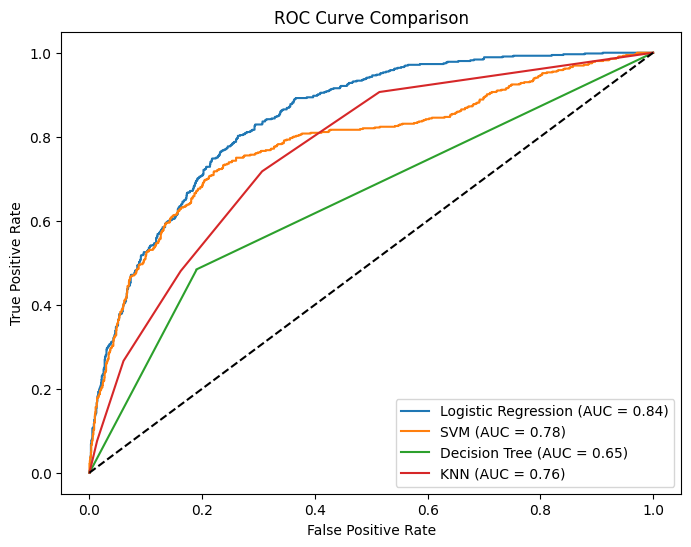

In [128]:

models = {
    "Logistic Regression": log_model,
    "SVM": svm_model,
    "Decision Tree": dt_model,
    "KNN": knn_model
}

plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(Y_test, y_prob):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


## Feature Importance Visualization (Decision Tree Example)

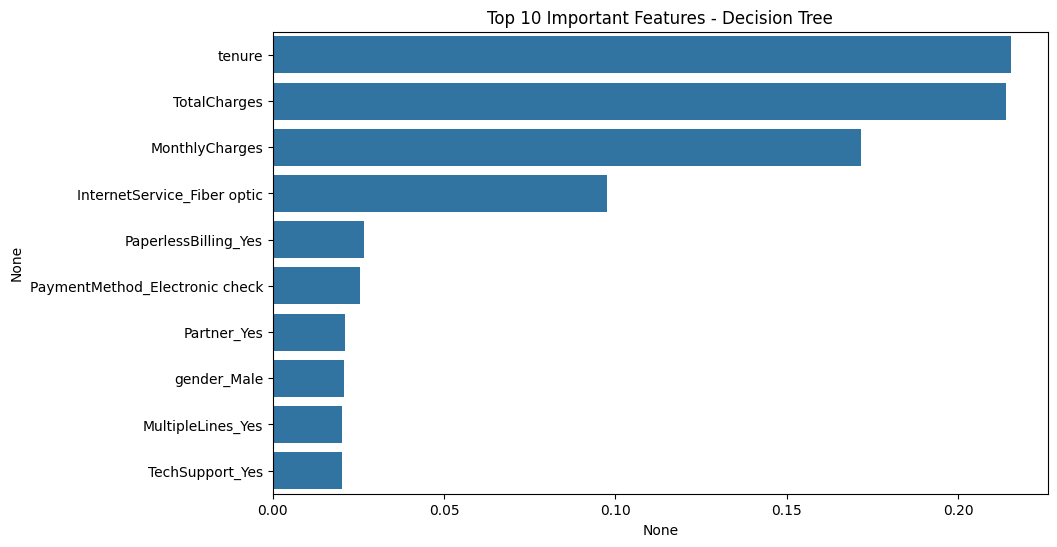

In [129]:

importances = dt_model.feature_importances_
features = df1.drop(columns=['Churn_Yes']).columns


feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title('Top 10 Important Features - Decision Tree')
plt.show()


## Hyperparameter Tuning Example (Decision Tree)

In [130]:

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': [3, 5, 7, None],
              'min_samples_split': [2, 5, 10]}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.7918864097363083


## Prediction Example for a New Sample

In [131]:
sample = X_test[0:1]
pred = log_model.predict(sample)
print("Predicted churn:", "Yes" if pred[0] == 1 else "No")


Predicted churn: No


## Dataset Loading (Relative Path for Portability)

In [132]:

import os
import pandas as pd

dataset_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

if not os.path.exists(dataset_path):
    print("⚠️ Please place the dataset in the same directory as this notebook.")
else:
    df = pd.read_csv(dataset_path)
    print("✅ Dataset loaded successfully:", df.shape)


✅ Dataset loaded successfully: (7043, 21)


## Exploratory Data Analysis (Visual Insights)

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_25924\925920161.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


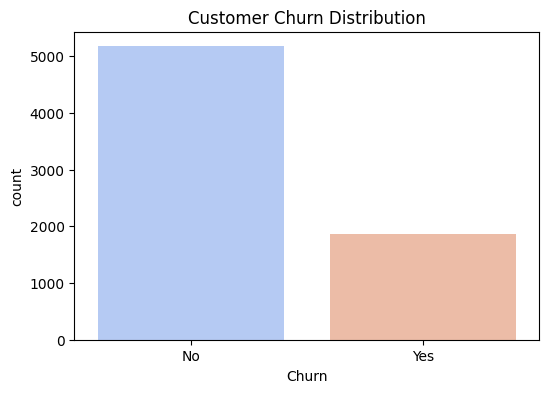

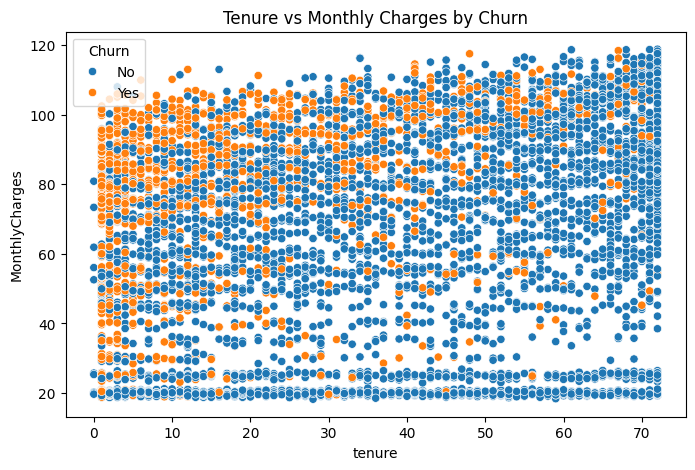

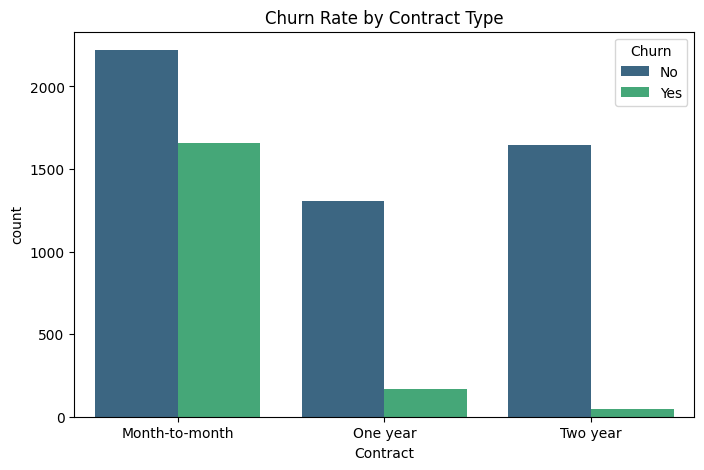

In [133]:

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Customer Churn Distribution')
plt.show()

# 2. Tenure vs MonthlyCharges
plt.figure(figsize=(8,5))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Tenure vs Monthly Charges by Churn')
plt.show()

# 3. Churn rate by Contract Type
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='viridis')
plt.title('Churn Rate by Contract Type')
plt.show()


## Random Forest and XGBoost Model Comparison

In [134]:
!pip install xgboost


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\Sanjay\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:43:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Sanjay\AppData\Local\Temp\ipykernel_25924\1328410920.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='coolwarm')


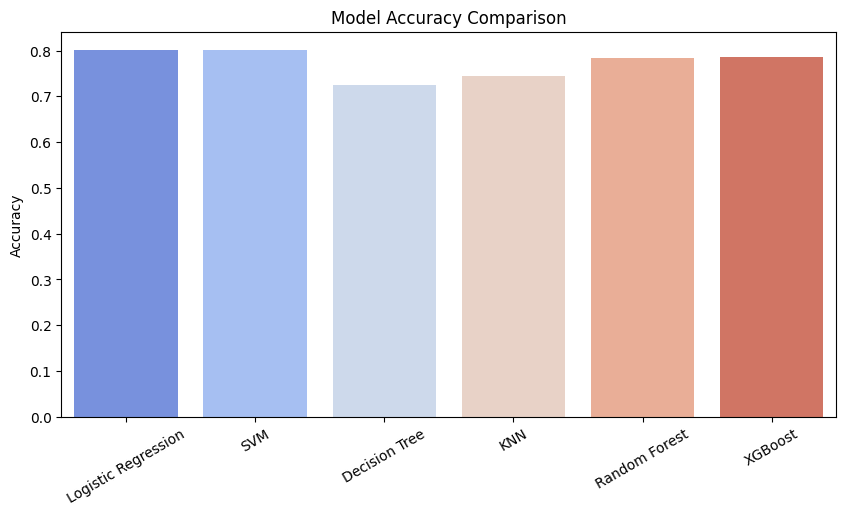

In [135]:

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Train RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(Y_test, rf_pred)

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, Y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(Y_test, xgb_pred)

# Accuracy comparison chart
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(Y_test, log_model.predict(X_test)),
    accuracy_score(Y_test, svm_model.predict(X_test)),
    accuracy_score(Y_test, dt_model.predict(X_test)),
    accuracy_score(Y_test, knn_model.predict(X_test)),
    rf_acc, xgb_acc
]

plt.figure(figsize=(10,5))
sns.barplot(x=model_names, y=accuracies, palette='coolwarm')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=30)
plt.show()
